<a href="https://colab.research.google.com/github/CodeWithAlvin/ml_practice/blob/main/FMnist_ch10_q10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow import keras

In [15]:
import keras.datasets.mnist as mnist
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
data=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [68]:
train,test=data

In [69]:
X_train_full,y_train_full=train
X_test,y_test=test

In [70]:
X_train,X_val,y_train,y_val=train_test_split(X_train_full,y_train_full,test_size=0.15,random_state=42)

In [67]:
def flatten_and_scale(X):
    X_new=[]
    for array in X:
        X_new.append(array.reshape(784))
    return StandardScaler().fit_transform(np.array(X_new))

In [71]:
X_test=flatten_and_scale(X_test)
X_train=flatten_and_scale(X_train)
X_val=flatten_and_scale(X_val)

In [79]:
model=keras.models.Sequential([
    keras.layers.Input(shape=(784,)),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(300, activation="tanh"),
    keras.layers.Dense(10, activation="softmax")
])

In [80]:
model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])

### some Callbacks

In [81]:
checkpoint=keras.callbacks.ModelCheckpoint("F_mnist.h5",save_best_only=True)
early_bird=keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [82]:
history=model.fit(X_train,y_train,
 epochs=100,
 validation_data=(X_val,y_val),
 callbacks=[checkpoint, early_bird]
)

Epoch 1/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.6814 - accuracy: 0.8081 - val_loss: 0.2328 - val_accuracy: 0.9294
Epoch 2/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1970 - accuracy: 0.9421 - val_loss: 0.1761 - val_accuracy: 0.9482
Epoch 3/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1419 - accuracy: 0.9590 - val_loss: 0.1503 - val_accuracy: 0.9553
Epoch 4/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.1075 - accuracy: 0.9703 - val_loss: 0.1323 - val_accuracy: 0.9596
Epoch 5/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0840 - accuracy: 0.9769 - val_loss: 0.1226 - val_accuracy: 0.9627
Epoch 6/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0670 - accuracy: 0.9820 - val_loss: 0.1146 - val_accuracy: 0.9648
Epoch 7/100
1594/1594 [==============================] - 8s 5ms/step - loss: 0.0542 - accuracy: 0.9862 - val_loss: 0.1088 - val_ac

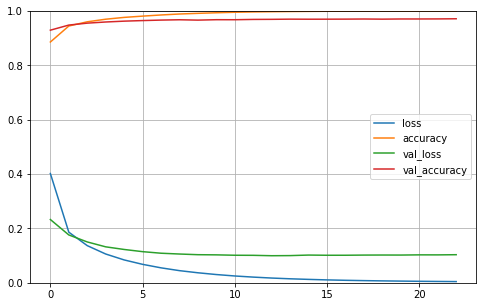

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.gca().set_ylim(0,1)
plt.grid(True)
plt.show()

In [84]:
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix
import numpy as np
 
y_pred1 = model.predict(X_test)
y_pred = np.argmax(y_pred1, axis=1)
 
# Print f1, precision, and recall scores
print(precision_score(y_test, y_pred , average="macro"))
print(recall_score(y_test, y_pred , average="macro"))
print(f1_score(y_test, y_pred , average="macro"))

0.9691232595953354
0.9690425905470734
0.969052389532562
